In [156]:
import yfinance as yf
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import datetime as dt

In [157]:
bti = yf.download('BTI', start='2020-01-01', end='2022-01-01')

[*********************100%%**********************]  1 of 1 completed


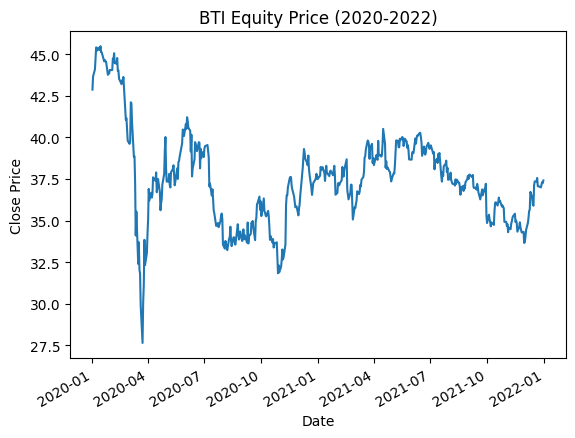

In [158]:
bti['Close'].plot(title="BTI Equity Price (2020-2022)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

In [159]:
bti['Daily Return'] = bti['Close'].pct_change()

In [160]:
mean_daily_return = bti['Daily Return'].mean()
annualized_avg_return = (1 + mean_daily_return)** 252 - 1 
print(f"Annualized Average Return: {annualized_avg_return * 100:.2f}%")

Annualized Average Return: -2.70%


In [161]:
annualized_std_dev = bti['Daily Return'].std() * np.sqrt(252)
print(f"Annualized Standard Deviation: {annualized_std_dev * 100:.2f}%")

Annualized Standard Deviation: 28.51%


In [162]:
ADJ =  bti ['Adj Close']
ADJ.info()


<class 'pandas.core.series.Series'>
DatetimeIndex: 505 entries, 2020-01-02 to 2021-12-31
Series name: Adj Close
Non-Null Count  Dtype  
--------------  -----  
505 non-null    float64
dtypes: float64(1)
memory usage: 7.9 KB


In [163]:
ADJ.describe().round(2)

count    505.00
mean      29.96
std        2.23
min       20.65
25%       28.63
50%       30.32
75%       31.59
max       33.97
Name: Adj Close, dtype: float64

Option Pricing Model

In [164]:
ticker = 'BTI'
start_date = '2020-04-01'
end_date = '2022-04-02'

data = yf.download(ticker, start=start_date, end=end_date)

if not data.empty:
    closing_price = data['Close'][0]
    print(f"The closing price of {ticker} on {start_date} was {closing_price}")
else:
    print(f"No data available for {ticker} on {start_date}")

[*********************100%%**********************]  1 of 1 completed
The closing price of BTI on 2020-04-01 was 35.06999969482422


In [165]:
pip install pandas-datareader


Note: you may need to restart the kernel to use updated packages.


In [177]:

start = dt.datetime(2020, 4, 1)
end = dt.datetime(2020, 4, 2)  

try:
    treasury_data = pdr.get_data_fred('DGS10', start, end)
    rate_on_target_date = treasury_data.iloc[0]['DGS10']
    print(f"US Treasury Bond rate on 01/04/2020: {rate_on_target_date}%")
except Exception as e:
    print(f"Error fetching data: {e}")


US Treasury Bond rate on 01/04/2020: 0.62%


#find the volatility rate

In [179]:
ticker = 'BTI'

data = yf.download(ticker, start="2019-01-01", end="2020-01-01")

data['Daily Return'] = data['Adj Close'].pct_change()

volatility = data['Daily Return'].std() * (252 ** 0.5)

print(f"The annualized volatility of {ticker} is: {volatility * 100:.2f}%")


[*********************100%%**********************]  1 of 1 completed
The annualized volatility of BTI is: 26.83%


 Black-shole and Monte Carlo Simulation

In [180]:


# Black-Scholes-Merton Model
def black_scholes_merton(S, K, T, r, sigma):
    """
    S: spot price of the underlying asset
    K: strike price of the option
    T: time to maturity (in years)
    r: risk-free interest rate (annual)
    sigma: volatility of the underlying asset
    """
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_option_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_option_price
# Parameters
S = 35  # Current stock price
K = 30  # Option strike price
T = 1    # Time to maturity in years
r = 0.06 # Risk-free rate
sigma = 0.26 # Volatility

bsm_price = black_scholes_merton(S, K, T, r, sigma)

print(f"Black-Scholes-Merton Option Price: {bsm_price:.2f}")


Black-Scholes-Merton Option Price: 7.68


In [181]:
# Monte Carlo Simulation
def monte_carlo_simulation(S, K, T, r, sigma, simulations=10000):
    """
    S, K, T, r, sigma as above
    simulations: number of simulations to run
    """
    np.random.seed(0)  
    Z = np.random.standard_normal(simulations)
    ST = S * np.exp((r - 0.5 * sigma ** 2) * T + sigma * np.sqrt(T) * Z)
    call_option_payoffs = np.maximum(ST - K, 0)
    call_option_price_mc = np.exp(-r * T) * np.mean(call_option_payoffs)
    return call_option_price_mc

# Parameters
S = 35  # Current stock price
K = 30  # Option strike price
T = 1    # Time to maturity in years
r = 0.06 # Risk-free rate
sigma = 0.26 # Volatility

mc_price = monte_carlo_simulation(S, K, T, r, sigma)

print(f"Monte Carlo Simulation Option Price: {mc_price:.2f}")

Monte Carlo Simulation Option Price: 7.50


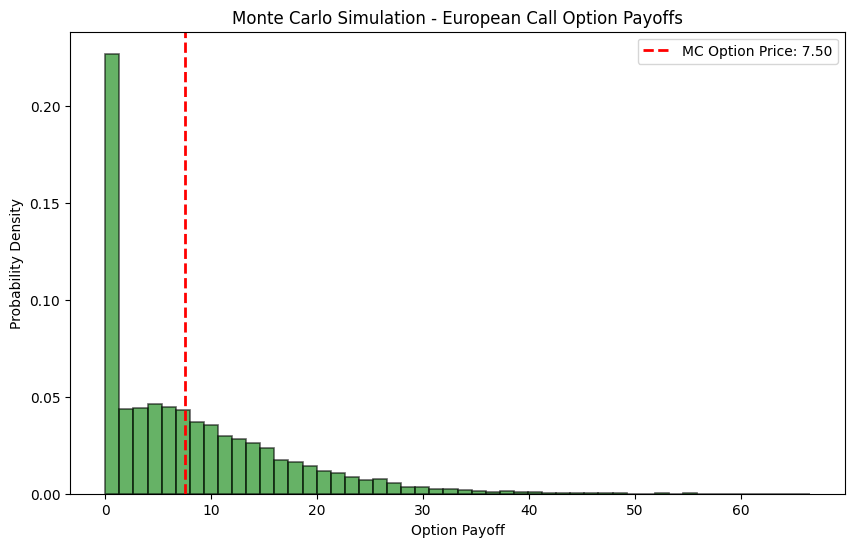

In [215]:
def monte_carlo_simulation(S, K, T, r, sigma, simulations=10000):
    """
    S, K, T, r, sigma as above
    simulations: number of simulations to run
    """
    np.random.seed(0)
    Z = np.random.standard_normal(simulations)
    ST = S * np.exp((r - 0.5 * sigma ** 2) * T + sigma * np.sqrt(T) * Z)
    call_option_payoffs = np.maximum(ST - K, 0)
    call_option_price_mc = np.exp(-r * T) * np.mean(call_option_payoffs)
    return call_option_price_mc, call_option_payoffs

# Parameters
S = 35  # Current stock price
K = 30  # Option strike price
T = 1    # Time to maturity in years
r = 0.06 # Risk-free rate
sigma = 0.26 # Volatility

# Monte Carlo simulation
simulations = 10000
mc_price, mc_payoffs = monte_carlo_simulation(S, K, T, r, sigma, simulations)

# Plotting the results
plt.figure(figsize=(10, 6))

# Plot histogram of call option payoffs
plt.hist(mc_payoffs, bins=50, density=True, alpha=0.6, color='g', edgecolor='black', linewidth=1.2)
plt.title('Monte Carlo Simulation - European Call Option Payoffs')
plt.xlabel('Option Payoff')
plt.ylabel('Probability Density')

# Plot vertical line at the Monte Carlo option price
plt.axvline(mc_price, color='r', linestyle='dashed', linewidth=2, label=f'MC Option Price: {mc_price:.2f}')
plt.legend()

plt.show()

#Greeks

In [216]:

# Black-Scholes-Merton Greeks
def bsm_greeks(S, K, T, r, sigma):
    """
    S: spot price of the underlying asset
    K: strike price of the option
    T: time to maturity (in years)
    r: risk-free interest rate (annual)
    sigma: volatility of the underlying asset
    """
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    # Delta
    delta = norm.cdf(d1)

    # Gamma
    gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))

    # Vega
    vega = S * norm.pdf(d1) * np.sqrt(T)

    # Theta
    theta = - (S * norm.pdf(d1) * sigma) / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * norm.cdf(d2)


    return delta, gamma, vega, theta

# Parameters (example values)
S = 35  # Current stock price
K = 30  # Option strike price
T = 1    # Time to maturity in years
r = 0.06 # Risk-free rate
sigma = 0.26 # Volatility

# Calculate Greeks
delta, gamma, vega, theta = bsm_greeks(S, K, T, r, sigma)

print(f"Delta: {delta:.2f}")
print(f"Gamma: {gamma:.2f}")
print(f"Vega: {vega:.2f}")
print(f"Theta: {theta:.2f}")



Delta: 0.83
Gamma: 0.03
Vega: 8.86
Theta: -2.43


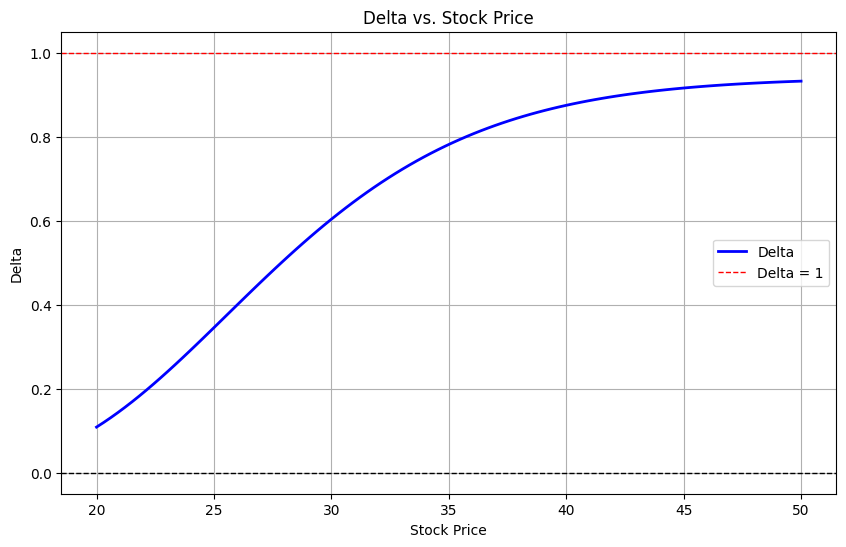

In [217]:

def black_scholes_delta(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    delta = np.exp(-r * T) * norm.cdf(d1)
    return delta

# Given parameters
S = 35  # Current stock price
K = 30  # Option strike price
T = 1   # Time to maturity in years
r = 0.06  # Risk-free rate
sigma = 0.26  # Volatility

# Range of stock prices for the plot
stock_prices = np.linspace(20, 50, 100)

# Calculate delta for each stock price
delta_values = [black_scholes_delta(price, K, T, r, sigma) for price in stock_prices]

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(stock_prices, delta_values, label='Delta', color='blue', linewidth=2)
plt.title('Delta vs. Stock Price')
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.axhline(1, color='red', linestyle='--', linewidth=1, label='Delta = 1')
plt.legend()
plt.grid(True)
plt.show()


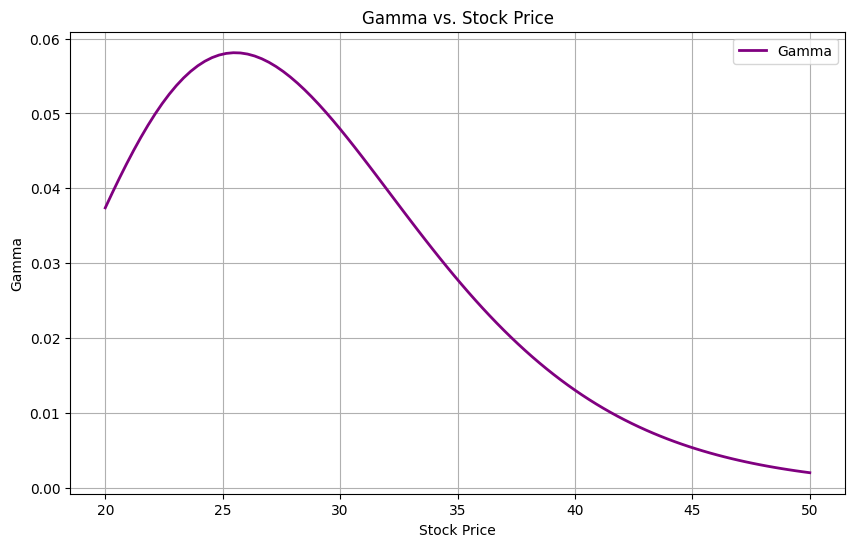

In [218]:

def black_scholes_gamma(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
    return gamma

# Given parameters
S = 35  # Current stock price
K = 30  # Option strike price
T = 1   # Time to maturity in years
r = 0.06  # Risk-free rate
sigma = 0.26  # Volatility

# Range of stock prices for the plot
stock_prices = np.linspace(20, 50, 100)

# Calculate gamma for each stock price
gamma_values = [black_scholes_gamma(price, K, T, r, sigma) for price in stock_prices]

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(stock_prices, gamma_values, label='Gamma', color='purple', linewidth=2)
plt.title('Gamma vs. Stock Price')
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.legend()
plt.grid(True)
plt.show()


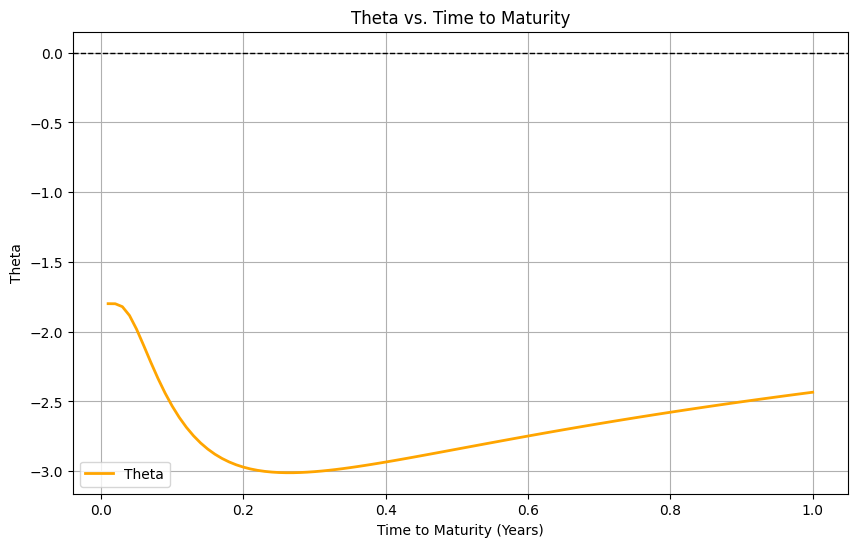

In [219]:

def black_scholes_theta(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    theta = - (S * norm.pdf(d1) * sigma) / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * norm.cdf(d2)
    return theta

# Given parameters
S = 35  # Current stock price
K = 30  # Option strike price
r = 0.06  # Risk-free rate
sigma = 0.26  # Volatility

# Range of time to maturity for the plot
time_to_maturity = np.linspace(0.01, 1, 100)

# Calculate theta for each time to maturity
theta_values = [black_scholes_theta(S, K, T, r, sigma) for T in time_to_maturity]

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(time_to_maturity, theta_values, label='Theta', color='orange', linewidth=2)
plt.title('Theta vs. Time to Maturity')
plt.xlabel('Time to Maturity (Years)')
plt.ylabel('Theta')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.legend()
plt.grid(True)
plt.show()


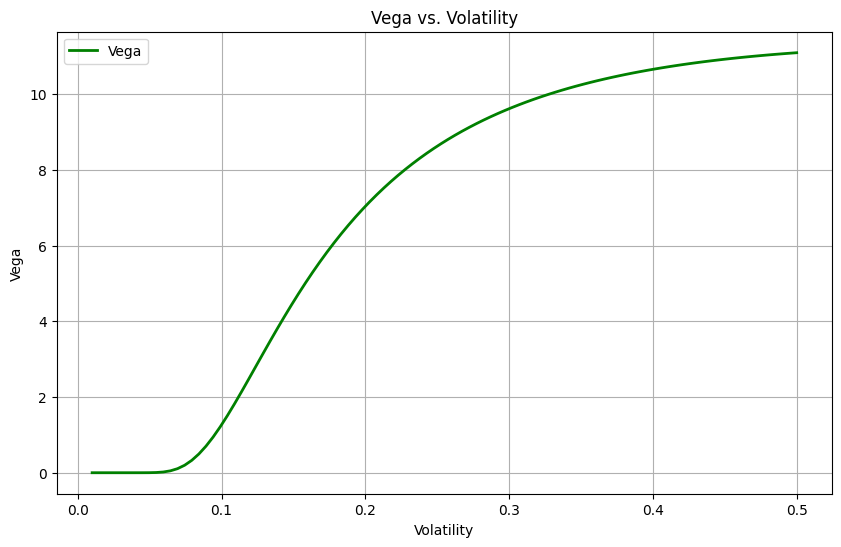

In [220]:

def black_scholes_vega(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    vega = S * norm.pdf(d1) * np.sqrt(T)
    return vega

# Given parameters
S = 35  # Current stock price
K = 30  # Option strike price
T = 1   # Time to maturity in years
r = 0.06  # Risk-free rate
sigma = 0.26  # Volatility

# Range of volatility for the plot
volatility_values = np.linspace(0.01, 0.5, 100)

# Calculate Vega for each volatility value
vega_values = [black_scholes_vega(S, K, T, r, vol) for vol in volatility_values]

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(volatility_values, vega_values, label='Vega', color='green', linewidth=2)
plt.title('Vega vs. Volatility')
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.legend()
plt.grid(True)
plt.show()


Conclusion

In [221]:
ticker = 'BTI'
start_date = '2021-04-01'
end_date = '2021-04-02'

data = yf.download(ticker, start=start_date, end=end_date)

if not data.empty:
    closing_price = data['Close'][0]
    print(f"The closing price of {ticker} on {start_date} was {closing_price}")
else:
    print(f"No data available for {ticker} on {start_date}")

[*********************100%%**********************]  1 of 1 completed
The closing price of BTI on 2021-04-01 was 38.33000183105469
